# Задание 6. Регрессия

## winequality.names

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None

## 0. Импорт библиотек, загрузка и обработка данных. У вас есть данные о физико-химических свойствах красных и белых вин и их качестве (будем восстанавливать качество по характеристикам).


### Подключим библиотеки.

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, accuracy_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

from sklearn.exceptions import NotFittedError

### Считаем данные и посмотрим на них.

In [2]:
df_red = pd.read_csv('winequality-red.csv', delimiter=';')
df_white = pd.read_csv('winequality-white.csv', delimiter=';')

print('Red wines data')
display(df_red.head())
print()

print('White wines data')
display(df_white.head())
print()

print('Unique values quality column red wines data')
print(df_red.quality.unique())
print()

print('Unique values quality column white wines data')
print(df_white.quality.unique())

Red wines data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



White wines data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



Unique values quality column red wines data
[5 6 7 4 8 3]

Unique values quality column white wines data
[6 5 7 8 4 3 9]


Константа TEST_SIZE будет использоваться во всех разделениях выборки на тестовую и тренировочную.

In [3]:
TEST_SIZE = 0.3

## 1. Обучите линейную регрессию на красных винах. Распечатайте среднеквадратическое отклонение на обучающей и тестовой выборках.

In [4]:
X, y = df_red.drop(columns=['quality']), df_red['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, shuffle=True, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(f'mse_train = {mean_squared_error(y_true=y_train, y_pred=y_pred_train)}')
print(f'mse_test = {mean_squared_error(y_true=y_test, y_pred=y_pred_test)}')

mse_train = 0.42078664921236153
mse_test = 0.41123487175042034


Colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html

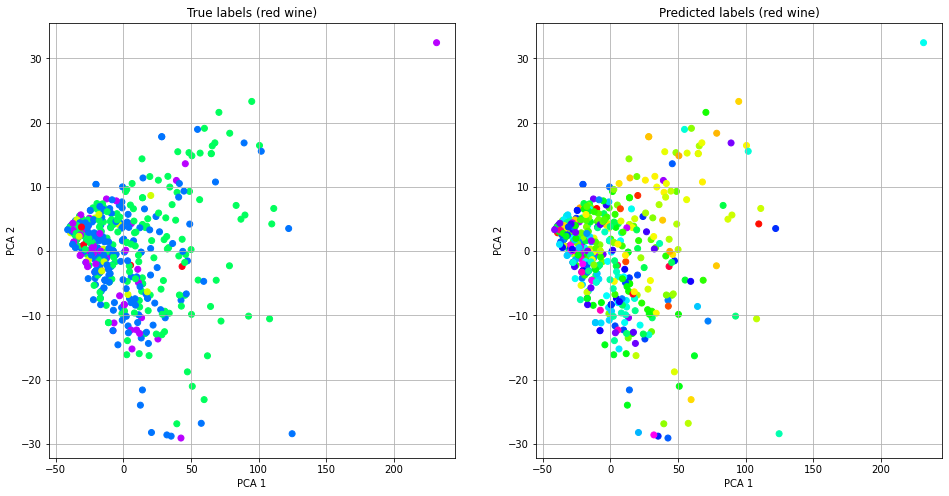

In [5]:
pca = PCA(n_components=2)

red_wine_test_pca_before_scaling = pca.fit_transform(X_test)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

# true labels red wine
ax1.scatter(red_wine_test_pca_before_scaling[:, 0], red_wine_test_pca_before_scaling[:, 1], c=y_test, cmap='hsv')   
ax1.grid(True)
ax1.set_title("True labels (red wine)")
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2");

# predicted labels red wine
ax2.scatter(red_wine_test_pca_before_scaling[:, 0], red_wine_test_pca_before_scaling[:, 1], c=y_pred_test, cmap='hsv')   
ax2.grid(True)
ax2.set_title("Predicted labels (red wine)")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2");

## 2. Снова обучите линейную регрессию на красных винах, но предварительно нормализуйте данные.

In [6]:
X_red, y_red = df_red.drop(columns=['quality']), df_red['quality']
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=TEST_SIZE, shuffle=True, random_state=42)

model_red = Pipeline([
        ('sca', MinMaxScaler()),
        ('reg', LinearRegression())
    ])
model_red.fit(X_train_red, y_train_red)
y_pred_train_red = model_red.predict(X_train_red)
y_pred_test_red = model_red.predict(X_test_red)

mse_train_red = mean_squared_error(y_true=y_train_red, y_pred=y_pred_train_red)
mse_test_red = mean_squared_error(y_true=y_test_red, y_pred=y_pred_test_red)
print(f'mse_train = {mse_train_red}')
print(f'mse_test = {mse_test_red}')

mse_train = 0.42078664921236164
mse_test = 0.4112348717504195


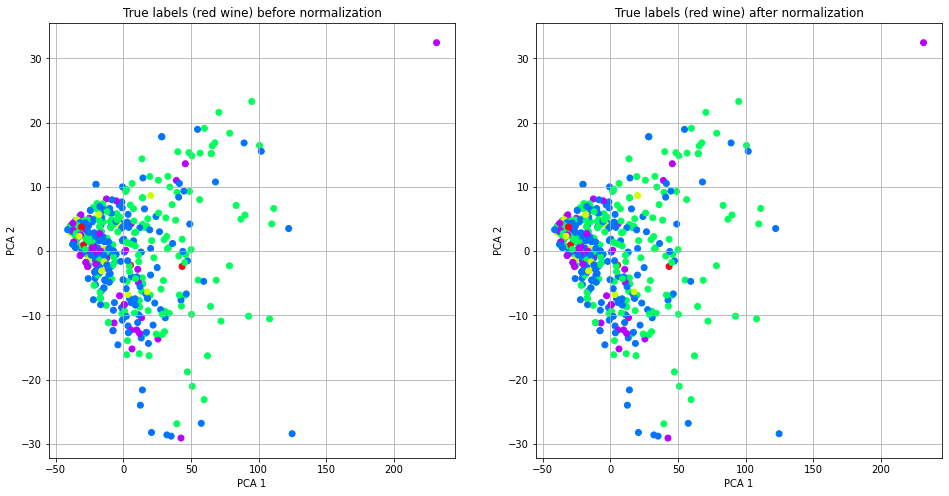

In [7]:
pca = PCA(n_components=2)

red_wine_test_pca = pca.fit_transform(X_test_red)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

# true labels red wine before normalization
ax1.scatter(red_wine_test_pca_before_scaling[:, 0], red_wine_test_pca_before_scaling[:, 1], c=y_test, cmap='hsv')   
ax1.grid(True)
ax1.set_title("True labels (red wine) before normalization")
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2");

# true labels red wine after normalization
ax2.scatter(red_wine_test_pca[:, 0], red_wine_test_pca[:, 1], c=y_test_red, cmap='hsv')   
ax2.grid(True)
ax2.set_title("True labels (red wine) after normalization")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2");

Если бы нормализация улучшила качество, графики выглядели бы по-разному.

## 3. Повторите пункт 2 на белых винах, сравните результаты. Визуализируйте.

In [8]:
X_white, y_white = df_white.drop(columns=['quality']), df_white['quality']
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=TEST_SIZE, shuffle=True, random_state=42)

model_white = Pipeline([
        ('sca', MinMaxScaler()),
        ('reg', LinearRegression())
    ])
model_white.fit(X_train_white, y_train_white)
y_pred_train_white = model_white.predict(X_train_white)
y_pred_test_white = model_white.predict(X_test_white)

mse_train_white = mean_squared_error(y_true=y_train_white, y_pred=y_pred_train_white)
mse_test_white = mean_squared_error(y_true=y_test_white, y_pred=y_pred_test_white)
# print(f'mse_train = {mse_train_white}')
# print(f'mse_test = {mse_test_white}')

mse_df = pd.DataFrame({'red': [mse_train_red, mse_test_red], 
                       'white': [mse_train_white, mse_test_white]},
                      index=['train MSE', 'test MSE'])
print(f'MSE comparison')
display(mse_df)

MSE comparison


,red,white
train MSE,0.420787,0.568202
test MSE,0.411235,0.554293


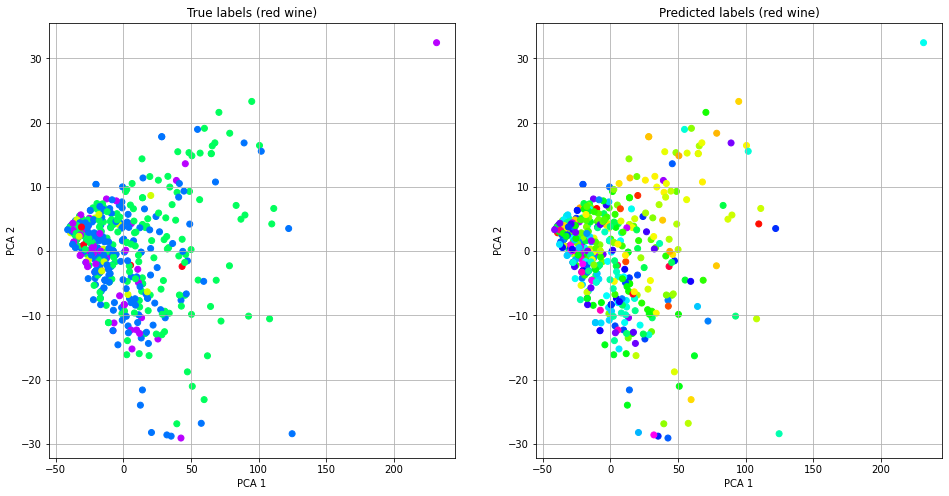

In [9]:
pca = PCA(n_components=2)

red_wine_test_pca = pca.fit_transform(X_test_red)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

# true labels red wine
ax1.scatter(red_wine_test_pca[:, 0], red_wine_test_pca[:, 1], c=y_test_red, cmap='hsv')   
ax1.grid(True)
ax1.set_title("True labels (red wine)")
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2");

# predicted labels red wine
ax2.scatter(red_wine_test_pca[:, 0], red_wine_test_pca[:, 1], c=y_pred_test_red, cmap='hsv')   
ax2.grid(True)
ax2.set_title("Predicted labels (red wine)")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2");

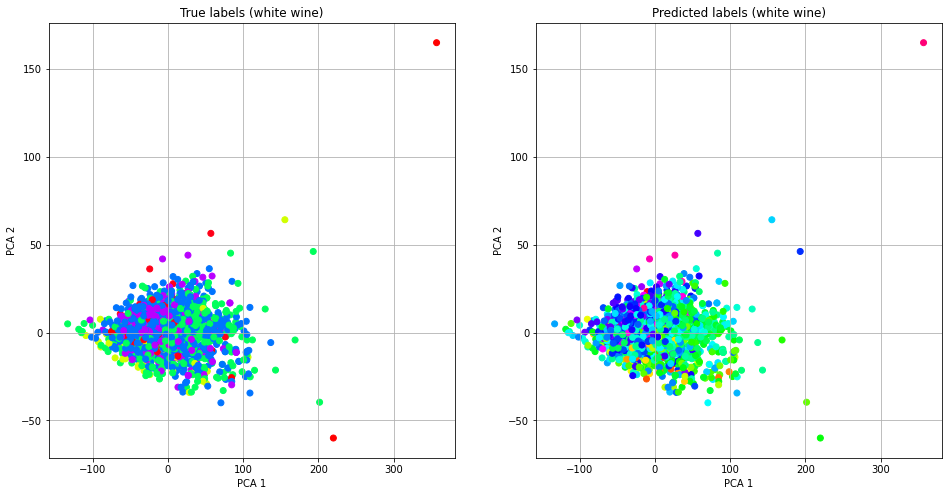

In [10]:
pca = PCA(n_components=2)

white_wine_test_pca = pca.fit_transform(X_test_white)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

# true labels white wine
ax1.scatter(white_wine_test_pca[:, 0], white_wine_test_pca[:, 1], c=y_test_white, cmap='hsv')   
ax1.grid(True)
ax1.set_title("True labels (white wine)")
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2");

# predicted labels red wine
ax2.scatter(white_wine_test_pca[:, 0], white_wine_test_pca[:, 1], c=y_pred_test_white, cmap='hsv') 
ax2.grid(True)
ax2.set_title("Predicted labels (white wine)")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2");

## 4. Обучите дерево решений для классификации белых вин. Используйте кросс-валидацию. Визуализируйте результаты.

In [11]:
X_white, y_white = df_white.drop(columns=['quality']), df_white['quality']
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=TEST_SIZE, shuffle=True, random_state=42)

model_white = Pipeline([
        ('sca', MinMaxScaler()),
        ('clf', tree.DecisionTreeClassifier(random_state=42))
    ])
model_white.fit(X_train_white, y_train_white)
y_pred_train_white = model_white.predict(X_train_white)
y_pred_test_white = model_white.predict(X_test_white)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


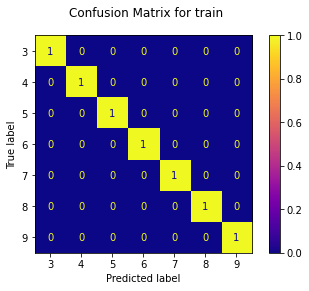

In [12]:
disp = plot_confusion_matrix(model_white, X_train_white, y_train_white, normalize='true', cmap='plasma')
disp.figure_.suptitle("Confusion Matrix for train")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


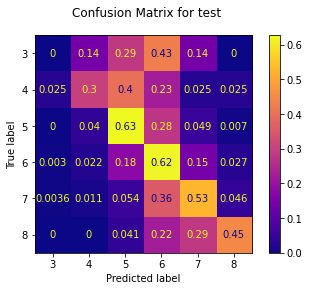

In [13]:
disp = plot_confusion_matrix(model_white, X_test_white, y_test_white, normalize='true', cmap='plasma')
disp.figure_.suptitle("Confusion Matrix for test")
plt.show()

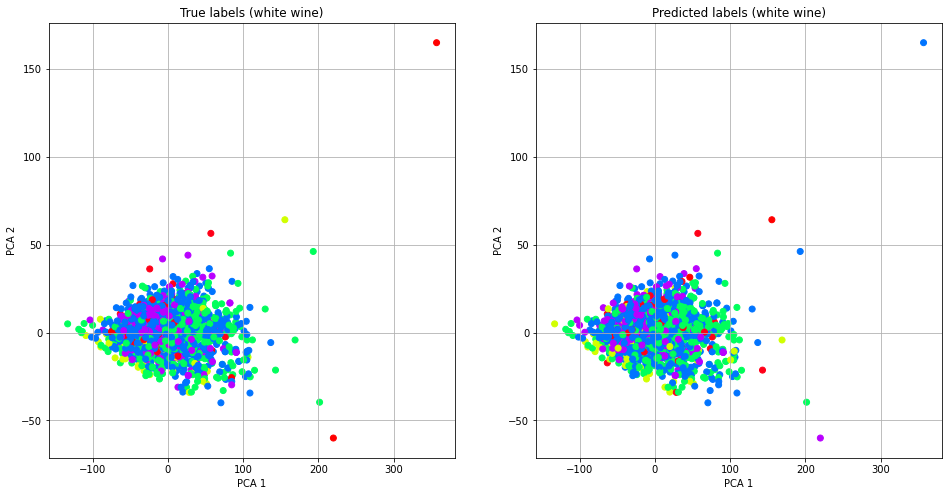

In [14]:
pca = PCA(n_components=2)

white_wine_test_pca = pca.fit_transform(X_test_white)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

# true labels white wine
ax1.scatter(white_wine_test_pca[:, 0], white_wine_test_pca[:, 1], c=y_test_white, cmap='hsv')   
ax1.grid(True)
ax1.set_title("True labels (white wine)")
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2");

# predicted labels red wine
ax2.scatter(white_wine_test_pca[:, 0], white_wine_test_pca[:, 1], c=y_pred_test_white, cmap='hsv') 
ax2.grid(True)
ax2.set_title("Predicted labels (white wine)")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2");

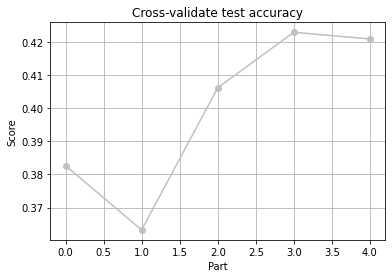

In [15]:
X_white, y_white = df_white.drop(columns=['quality']), df_white['quality']

results_clf = cross_validate(Pipeline([
        ('sca', MinMaxScaler()),
        ('clf', tree.DecisionTreeClassifier(random_state=42))
    ]), 
    X_white, y_white, cv=5,
    scoring='accuracy')

plt.plot([i for i in range(5)], results_clf['test_score'], marker='o', color='silver')
plt.title("Cross-validate test accuracy")
plt.xlabel("Part")
plt.ylabel("Score")
plt.grid(True)

## 5. Обучите дерево решений для регрессии на белых винах. Используйте кросс-валидацию. Визуализируйте результаты.

In [16]:
X_white, y_white = df_white.drop(columns=['quality']), df_white['quality']
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=TEST_SIZE, shuffle=True, random_state=42)

model_white = Pipeline([
        ('sca', MinMaxScaler()),
        ('reg', tree.DecisionTreeRegressor(random_state=42))
    ])
model_white.fit(X_train_white, y_train_white)
y_pred_train_white = model_white.predict(X_train_white)
y_pred_test_white = model_white.predict(X_test_white)

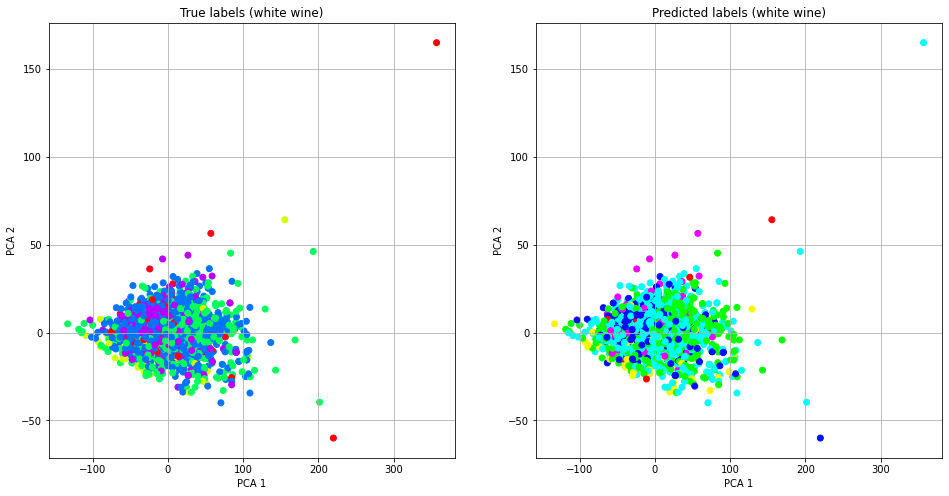

In [17]:
pca = PCA(n_components=2)

white_wine_test_pca = pca.fit_transform(X_test_white)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

# true labels white wine
ax1.scatter(white_wine_test_pca[:, 0], white_wine_test_pca[:, 1], c=y_test_white, cmap='hsv')   
ax1.grid(True)
ax1.set_title("True labels (white wine)")
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2");

# predicted labels red wine
ax2.scatter(white_wine_test_pca[:, 0], white_wine_test_pca[:, 1], c=y_pred_test_white, cmap='hsv') 
ax2.grid(True)
ax2.set_title("Predicted labels (white wine)")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2");

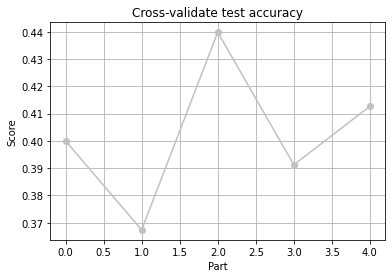

In [18]:
X_white, y_white = df_white.drop(columns=['quality']), df_white['quality']

results_reg = cross_validate(Pipeline([
        ('sca', MinMaxScaler()),
        ('reg', tree.DecisionTreeRegressor(random_state=42))
    ]), 
    X_white, y_white, cv=5,
    scoring='accuracy')

plt.plot([i for i in range(5)], results_reg['test_score'], marker='o', color='silver')
plt.title("Cross-validate test accuracy")
plt.xlabel("Part")
plt.ylabel("Score")
plt.grid(True)

## 6. Сравните результаты пунктов 4 и 5.

Mean accuracy
clf_mean_accuracy = 0.39915
reg_mean_accuracy = 0.40220

Comparison


,clf,reg
0,0.382653,0.400000
1,0.363265,0.367347
2,0.406122,0.439796
3,0.422880,0.391216
4,0.420838,0.412666


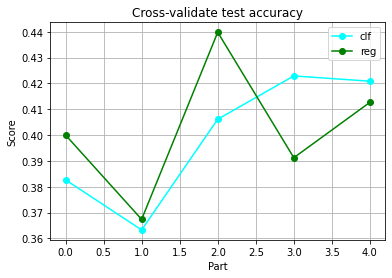

In [19]:
cv_df = pd.DataFrame({'clf': results_clf['test_score'], 
                       'reg': results_reg['test_score']},
                      index=[str(i) for i in range(5)])

print("Mean accuracy")
print(f"clf_mean_accuracy = {np.mean(np.abs(results_clf['test_score'])):.5f}")
print(f"reg_mean_accuracy = {np.mean(np.abs(results_reg['test_score'])):.5f}")
print()

print("Comparison")
display(cv_df)
print()

plt.plot([i for i in range(5)], results_clf['test_score'], marker='o', color='cyan', label='clf')
plt.plot([i for i in range(5)], results_reg['test_score'], marker='o', color='green', label='reg')
plt.title("Cross-validate test accuracy")
plt.xlabel("Part")
plt.ylabel("Score")
plt.grid(True)
plt.legend();

## 7. Проверьте работу дерева регрессии, обученного на белых винах, на данных красных вин. Можно ли сделать какой-то вывод из полученного результата?

In [20]:
X_white, y_white = df_white.drop(columns=['quality']), df_white['quality']
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=TEST_SIZE, shuffle=True, random_state=42)

X_red, y_red = df_red.drop(columns=['quality']), df_red['quality']
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=TEST_SIZE, shuffle=True, random_state=42)

model_white = Pipeline([
        ('sca', MinMaxScaler()),
        ('reg', tree.DecisionTreeRegressor(random_state=42))
    ])
model_white.fit(X_train_white, y_train_white)
y_pred_train_red = model_white.predict(X_train_red)
y_pred_test_red = model_white.predict(X_test_red)

acc_train_red = accuracy_score(y_true=y_train_red, y_pred=y_pred_train_red)
acc_test_red = accuracy_score(y_true=y_test_red, y_pred=y_pred_test_red)
print(f'accuracy_train = {acc_train_red:.5f}')
print(f'accuracy_test = {acc_test_red:.5f}')

accuracy_train = 0.30831
accuracy_test = 0.30833


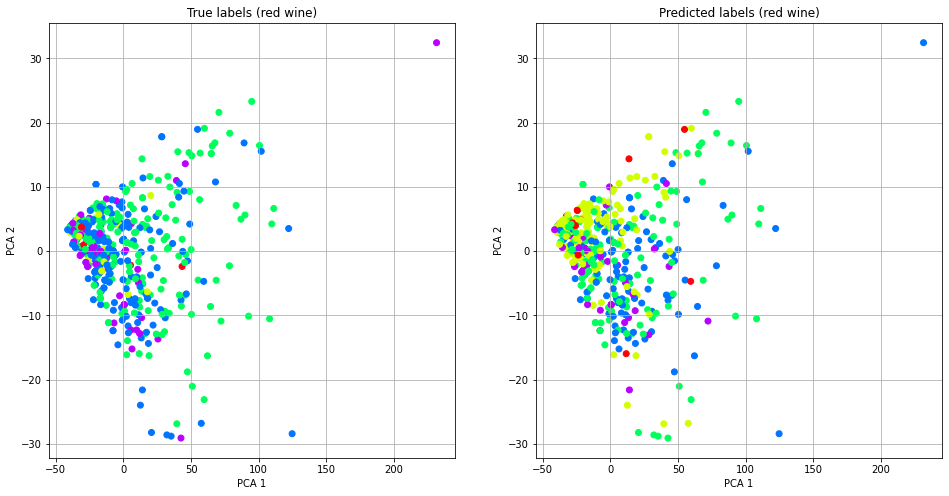

In [21]:
pca = PCA(n_components=2)

red_wine_test_pca = pca.fit_transform(X_test_red)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

# true labels red wine
ax1.scatter(red_wine_test_pca[:, 0], red_wine_test_pca[:, 1], c=y_test_red, cmap='hsv')   
ax1.grid(True)
ax1.set_title("True labels (red wine)")
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2");

# predicted labels red wine
ax2.scatter(red_wine_test_pca[:, 0], red_wine_test_pca[:, 1], c=y_pred_test_red, cmap='hsv')   
ax2.grid(True)
ax2.set_title("Predicted labels (red wine)")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2");

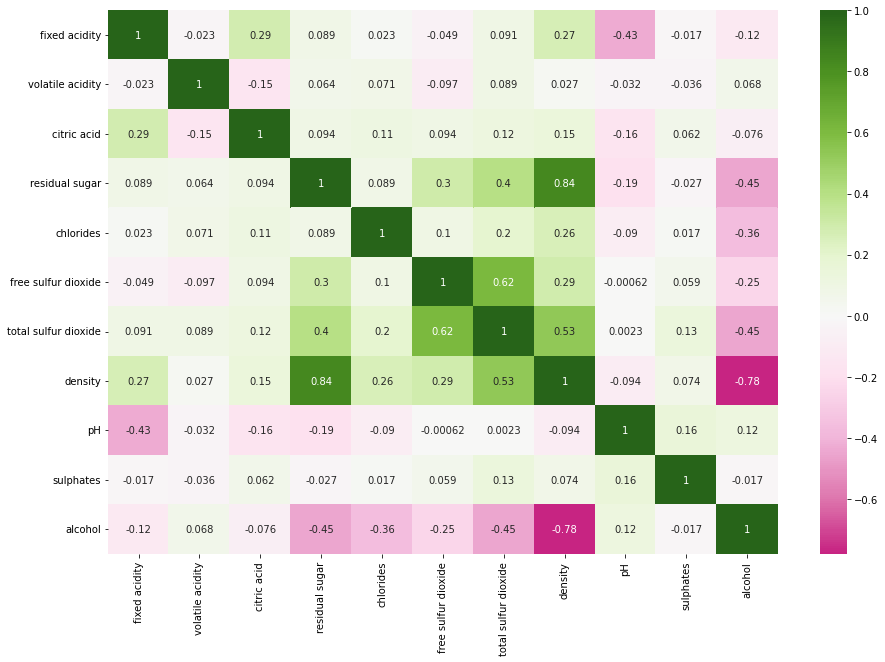

In [22]:
_, ax_ = plt.subplots(figsize=(15, 10))
sns.heatmap(pd.DataFrame.corr(df_white.drop(columns=['quality'])), center=0, annot=True, cmap='PiYG', ax=ax_);

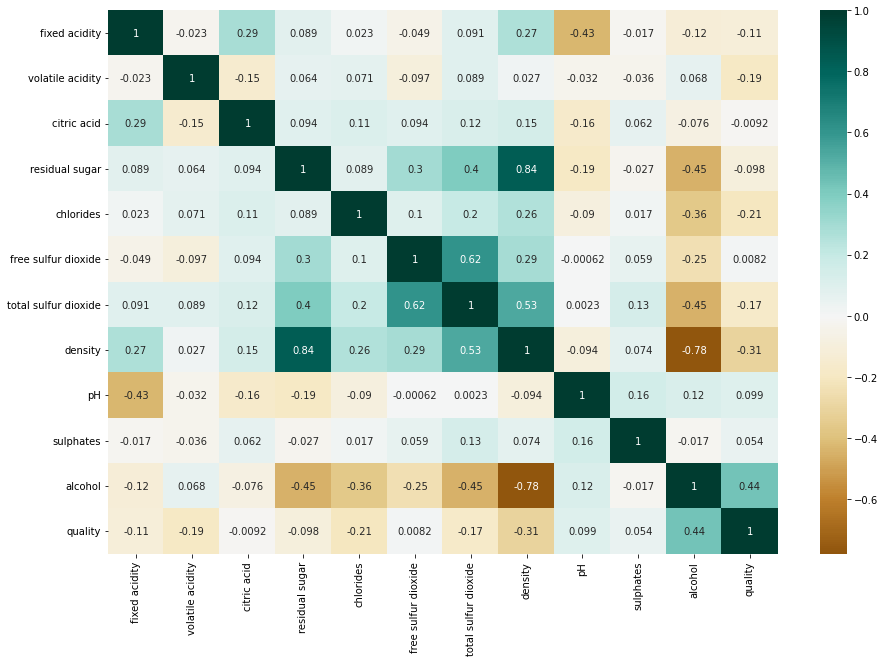

In [23]:
_, ax_ = plt.subplots(figsize=(15, 10))
sns.heatmap(pd.DataFrame.corr(df_white), center=0, annot=True, cmap='BrBG', ax=ax_);

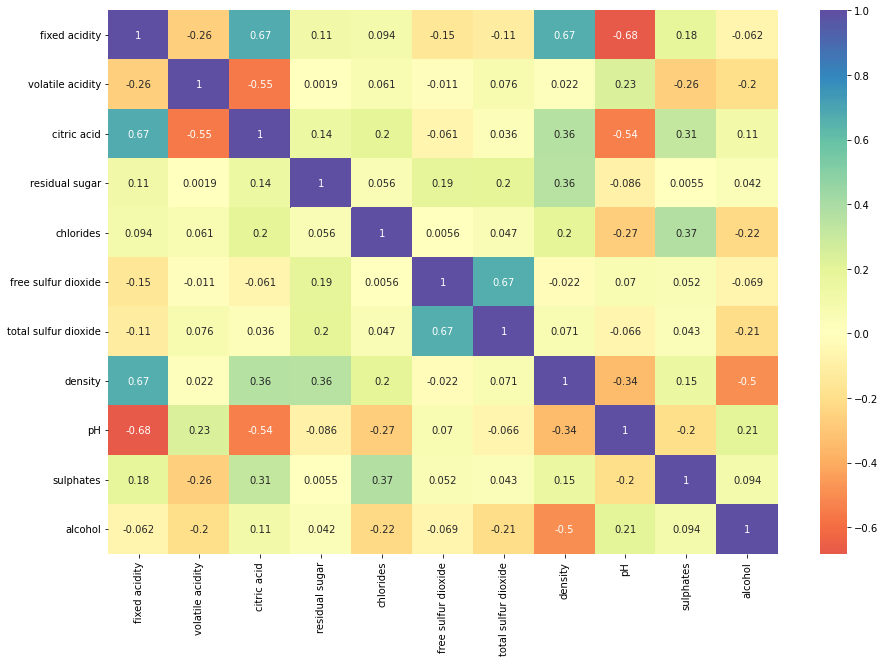

In [24]:
_, ax_ = plt.subplots(figsize=(15, 10))
sns.heatmap(pd.DataFrame.corr(df_red.drop(columns=['quality'])), center=0, annot=True, cmap='Spectral', ax=ax_);

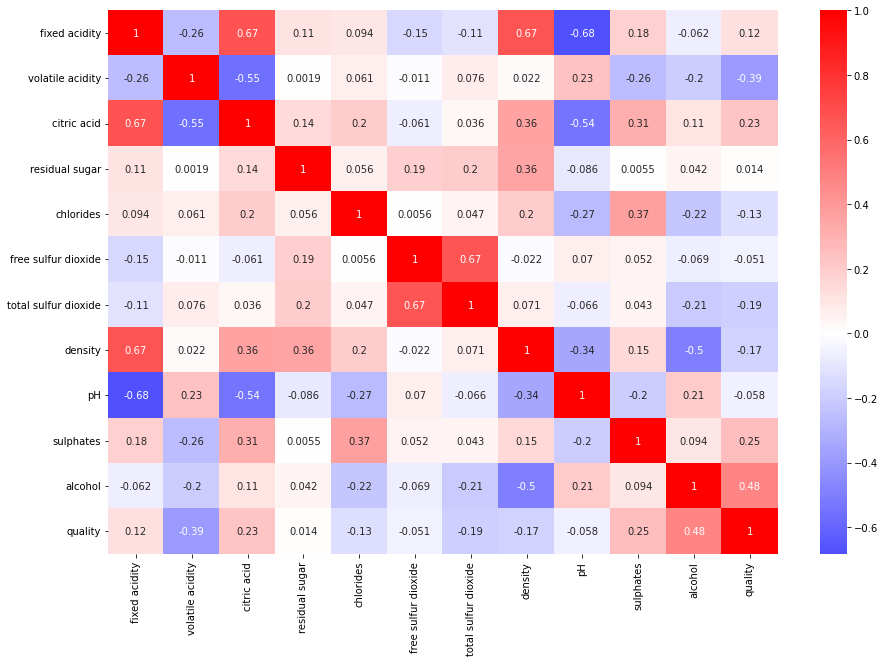

In [25]:
_, ax_ = plt.subplots(figsize=(15, 10))
sns.heatmap(pd.DataFrame.corr(df_red), center=0, annot=True, cmap='bwr', ax=ax_);

**Вывод.** Точность модели не сильно хуже. Вероятно, в общем датасеты похожи (по характеристикам и закономерностям). По теплокартам видно, что есть несколько коллинеарных признаков, что очень ухудшает качество модели.

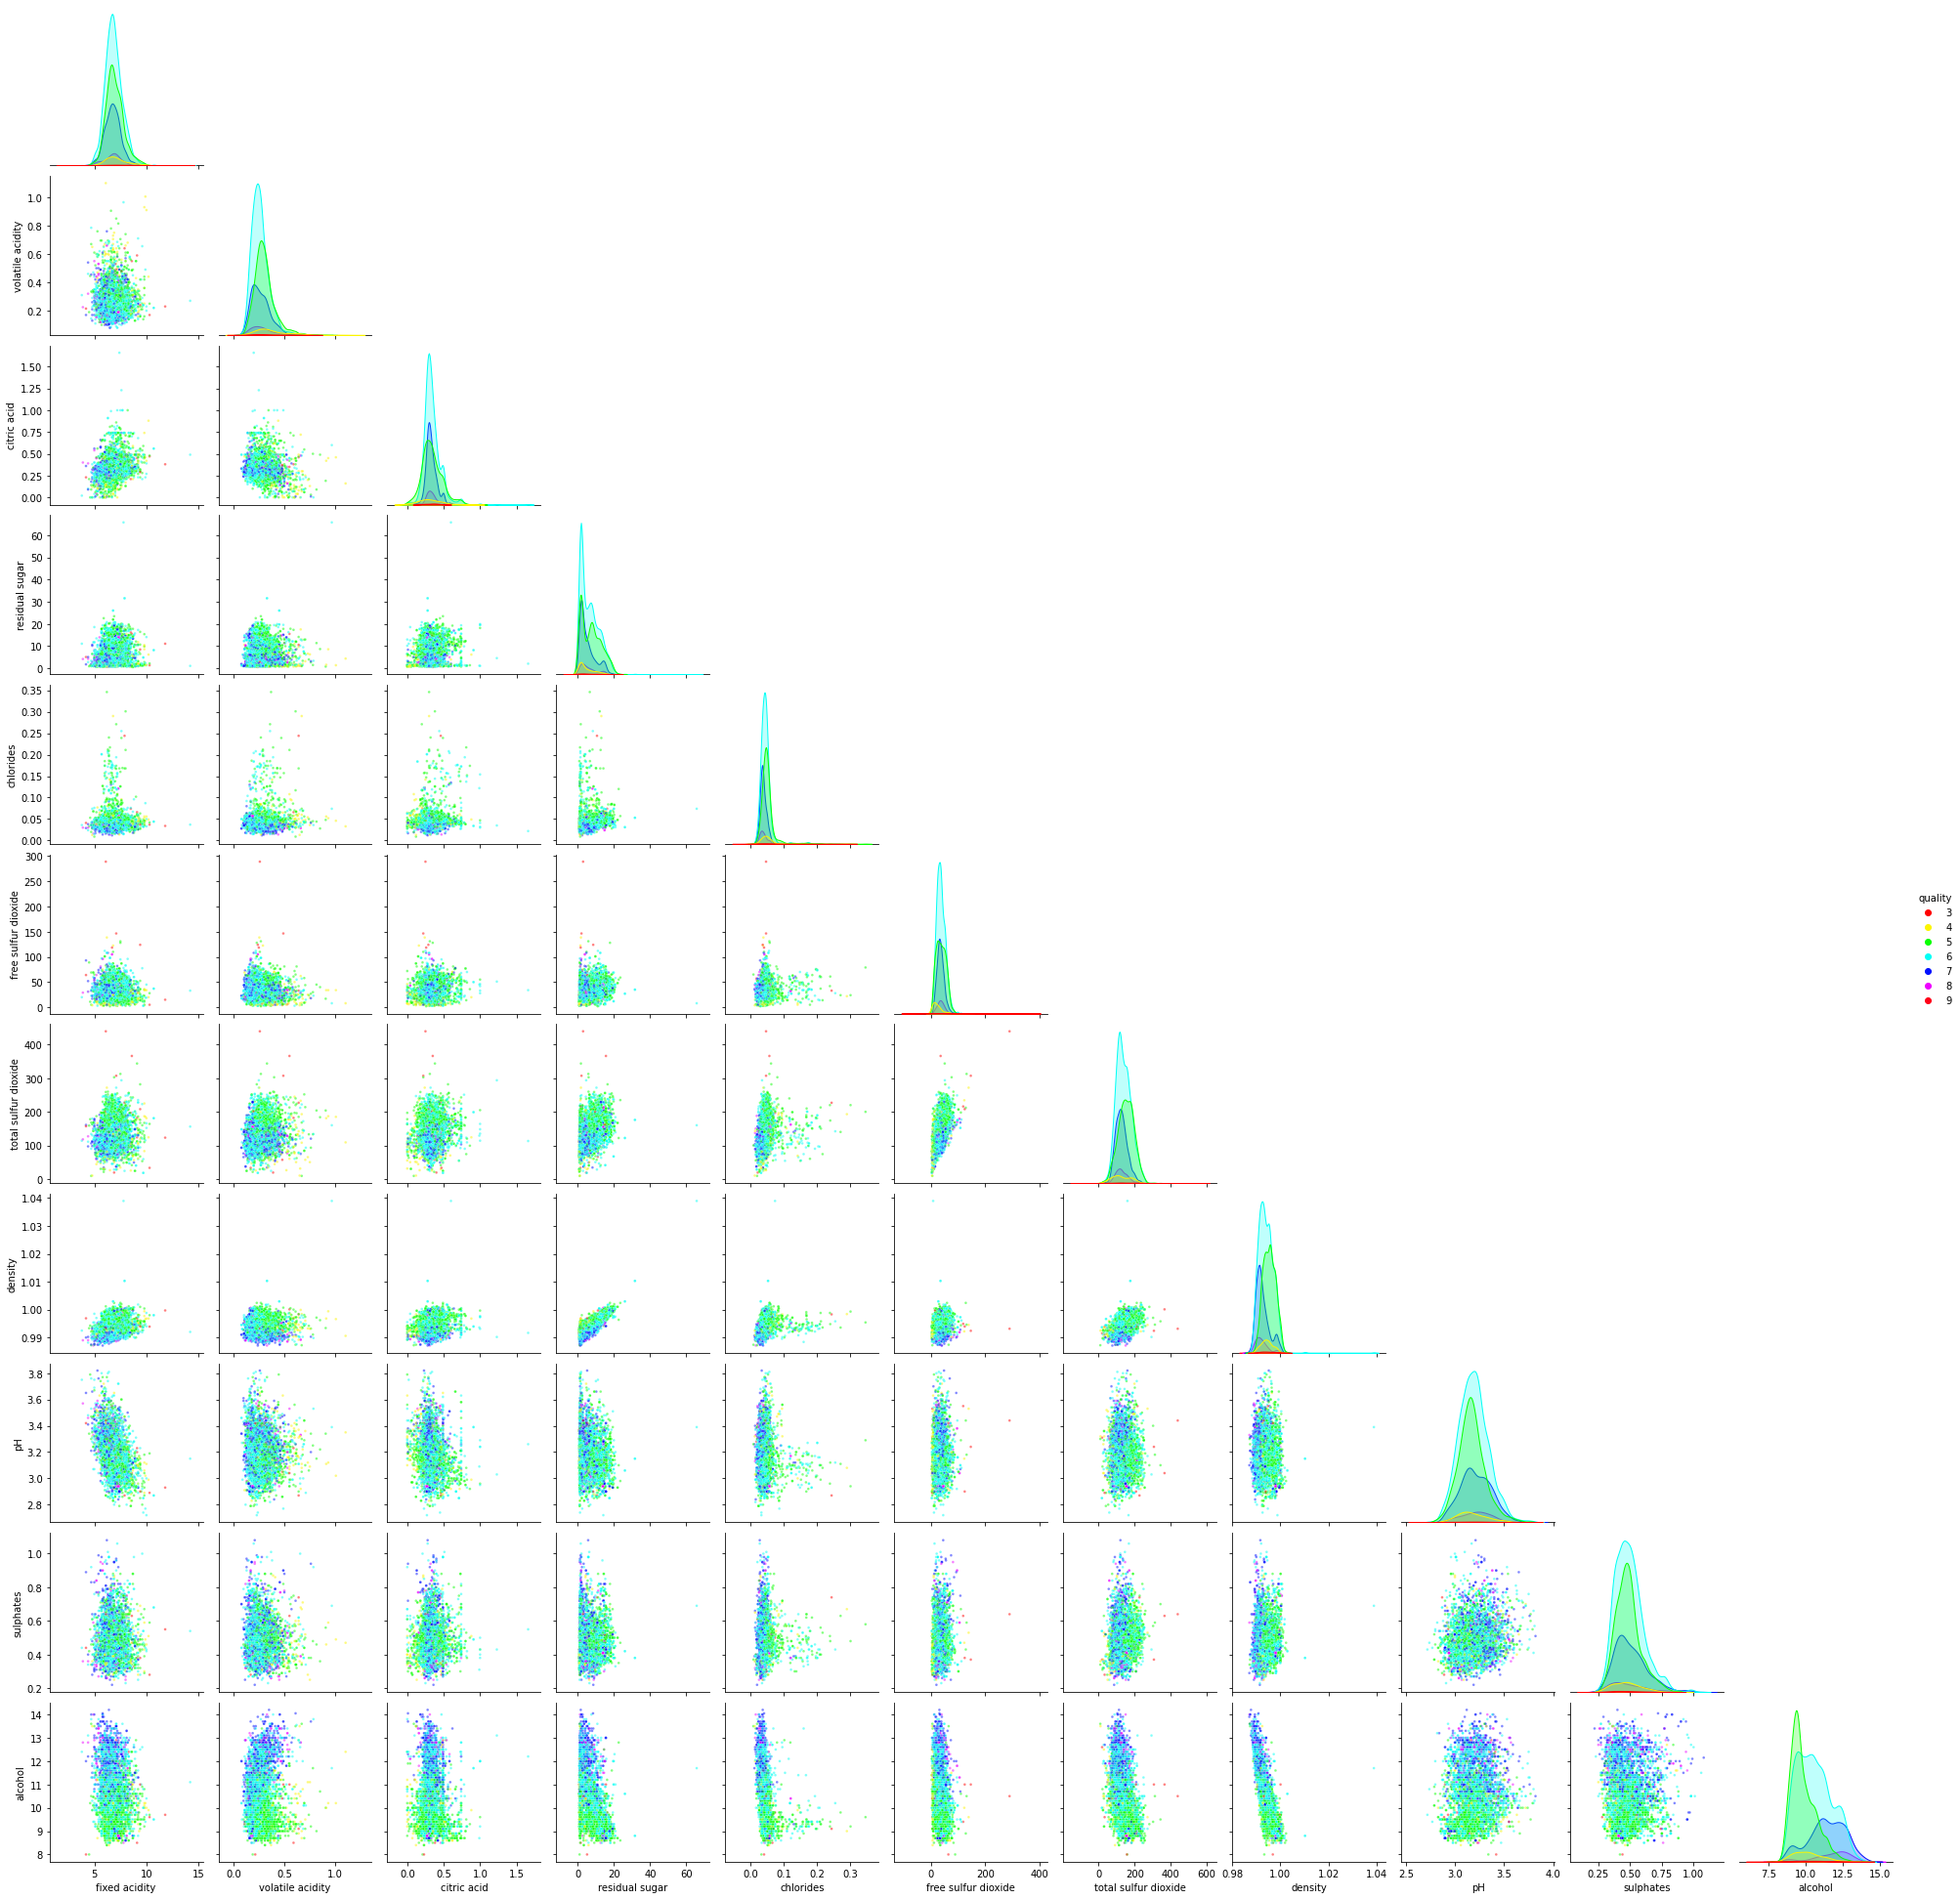

In [38]:
sns.pairplot(df_white, hue='quality', plot_kws={'s': 7, 'alpha': 0.5}, palette='hsv', corner=True);

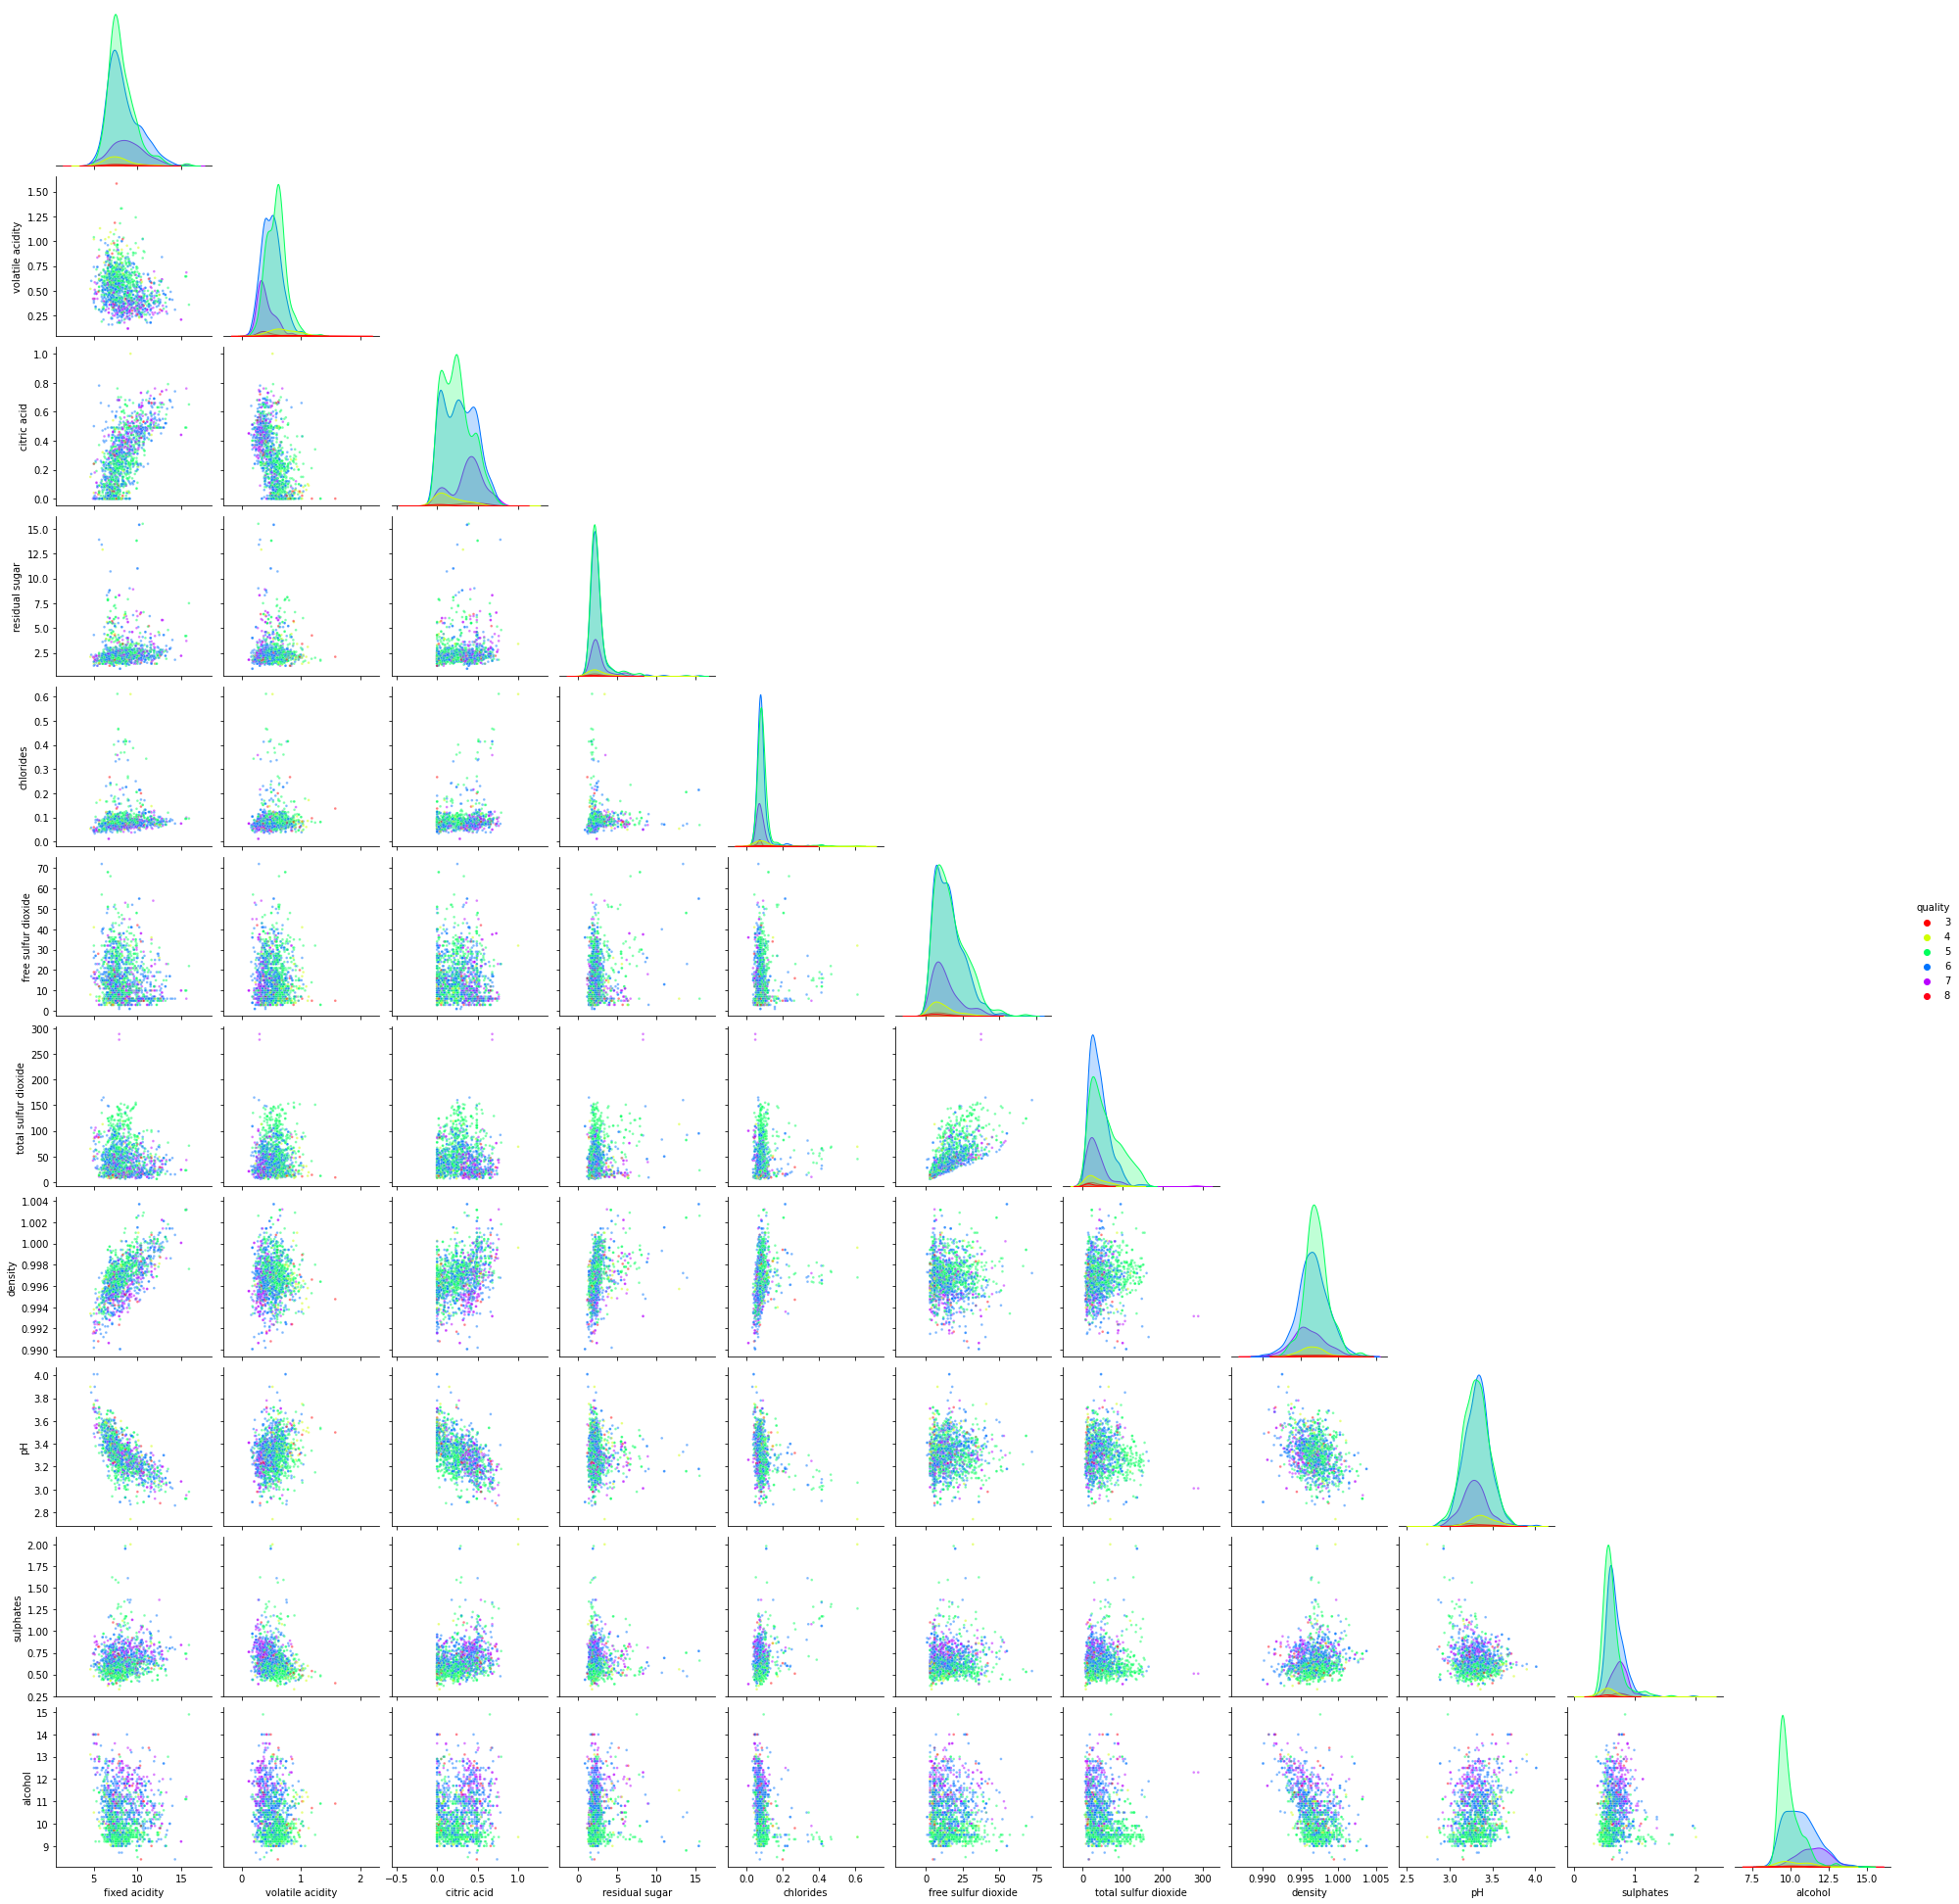

In [39]:
sns.pairplot(df_red, hue='quality', plot_kws={'s': 7, 'alpha': 0.5}, palette='hsv', corner=True);

# Custom Linear Regression.

## Custom metrics

* Mean Squared Error (mse)
* Mean Absolute Error (mae)
* Mean Absolute Percentage Error (mape)
* R-squared (r2)


Для MAPE:

* нужно поделить на 
  $ \hat{y}_{true} = (\hat{y}_{true}^{(0)}, \hat{y}_{true}^{(1)}, ..., \hat{y}_{true}^{(n)}) $,
  
  где $ \ \ \hat{y}_{true}^{(i)} = max(\ \ | y_{true}^{(i)} |, \ \ \epsilon), \ \ \epsilon > 0, \ \ y_{true}^{(i)} \in \mathbb R $
  

* для сравнения с `sklearn` следует взять 

  `eps = np.finfo(np.float64).eps`
  
  
Для $ R^2 $:

* формула: $ R^2 = 1 - \dfrac{SS_{residuals}}{SS_{total}} $


* Нужно возвращать:

    \begin{cases}
     R^2 & \text{ если } SS_{residuals} \ne 0 \text{ и  } SS_{total} \ne 0 
     \\
     0 & \text{ если } SS_{residuals} \ne 0 \text{ и  } SS_{total} = 0 
     \\
     1 & \text { иначе }
    \end{cases}

In [26]:
eps = np.finfo(np.float64).eps

def mse(*, y_true, y_pred):
    mse_res = np.mean((y_true - y_pred) ** 2)
    return mse_res
    
def mae(*, y_true, y_pred):
    mae_res = np.mean(abs(y_true - y_pred))
    return mae_res
    
def mape(*, y_true, y_pred):
    y_true_for_division = np.maximum(np.abs(y_true), eps)
    mape_res = np.mean(abs(y_true - y_pred) / y_true_for_division)
    return mape_res
    
def r2(*, y_true, y_pred):
    y_ = np.mean(y_true)
    ss_residuals = np.sum((y_true - y_pred) ** 2)
    ss_total = np.sum((y_true - y_) ** 2)
    if ss_residuals != 0 and ss_total != 0:
        r2_res = 1 - ss_residuals / ss_total
    elif ss_residuals != 0 and ss_total == 0:
        r2_res = 0
    else:
        r2_res = 1
    return r2_res

## Linear Regression

### Prerequisites

For this task you will need to:
* have basic understanding of Linear algebra (operations with vectors and matrices)
* know how to perform matrix multiplication, transposition and inversion using `numpy` 
  (these functions can be found in NumPy documentation)
* carefully read the theory below and refer to wiki / textbooks / other sources if required

---

### Theory and notation

When we extend Linear regression model on case with $m$ variables we get the following formula:

* $ \hat{y}
= 1 \cdot w_0 + x_1 \cdot w_1 + x_2 \cdot w_2 + ... + x_m \cdot w_m
= \sum_{i=0}^{m} x_i w_i
$,

where:
* $x = (1, x_1, ..., x_m)$ is an _(m+1)_-element feature vector. 
    * $x_0 = 1$ is a special term introduced in the beginning of feature vector 
      to add intercept to Linear regression model
    * $x_i, i=\overline{1,m}$ is an _i_-th feature value.
* $w = (w_0, w_1, ..., w_m)$ is an _(m+1)_-element parameter vector
    * $w_0$ - the first value of parameter vector - is referred to as **intercept**
* $\hat{y}$ is a predicted value

----

The formula above is used to calculate predictions for 1 sample.
i.e. we predict 1 scalar $\hat{y}$ from 1 feature vector $x$.

If we have a dataset of $n$ samples $(x, y)$ - we get a system of linear equations:

$
\begin{cases}
 \hat{y}^{(0)} = \sum_{i=0}^{m} x_i^{(0)} w_i \\
 \hat{y}^{(1)} = \sum_{i=0}^{m} x_i^{(1)} w_i \\
 ... \\\
 \hat{y}^{(n-1)} = \sum_{i=0}^{m} x_i^{(n-1)} w_i
\end{cases}
$

Such system can be rewritten in a succinct matrix form (a way that we write equations in Linear algebra):

* $ \hat{y} = X \cdot w $

And the task of minimizing Residual sum of squares (RSS) now looks:
* $ RSS(w, x, y) = \|y - \hat{y}\|_2^2 = \|y - X \cdot w \|_2^2 \rightarrow min $

Here:
* $y = (y^{(0)}, y^{(1)}, ..., y^{(n-1)})$ now denotes a **vector of target values** we want to predict<br>
  $y^{(j)}$ is a target value for _j_-th sample in a dataset.
* $\hat{y} = (\hat{y}^{(0)}, ..., \hat{y}^{(n-1)})$ 
  now denotes a **vector of predictions** <br>
  $\hat{y}^{(j)}$ denotes a predicted value for _j_-th sample in a dataset
* $X$ is a **feature matrix** of shape $n \times (m+1)$. <br>
  _n_ rows correspond to _n_ data samples and _m+1_ columns correspond to _m+1_ features that describe each sample.
* $w = (w_0, w_1, ..., w_m)$ is still a **model parameter vector**
* $X \cdot w$ denotes a **matrix-by-vector** multiplication
* $\|\cdot\|_2$ denotes an $L_2$-norm and is basically a square root of sum of squares of vector elements:<br>
  $\|a\|_2 = \sqrt{a_0^2 + a_1^2 + ... + a_{n-1}^2}$ for an _n_-component vector _a_.
  Thus, RSS means the same as before:<br>
  $ RSS(w, x, y) = \|y - \hat{y}\|_2^2 = 
  (y^{(0)} - \hat{y}^{(0)})^2 + (y^{(1)} - \hat{y}^{(1)})^2 + ... + (y^{(n-1)} - \hat{y}^{(n-1)})^2 = 
  \sum_{j=0}^{n-1} (y^{(j)} - \hat{y}^{(j)})^2
  $

Note:
* we now use **superscripts** $\hat{y}^{(i)}$ instead of **subscripts** $\hat{y}_i$ as before
  to denote _i_-th sample in a dataset
* it is done to be able to refer both to sample index (denoted by superscript)
  and feature index (denoted by subscript) in a single equation. 
  
  Thus:
  * $x^{(j)} = (1, x^{(j)}_1, x^{(j)}_2, ..., x^{(j)}_{m})$  now denotes 
  _j_-th feature vector in a dataset with _m+1_ features
  * $x_i^{(j)}$ denotes an _i_-th feature value of _j_-th feature vector
  * $X = 
    \begin{bmatrix}
      1 & x^{(0)}_1 & x^{(0)}_2 & ... & x^{(0)}_{m} \\
      1 & x^{(1)}_1 & x^{(1)}_2 & ... & x^{(1)}_{m} \\
      ... \\
      1 & x^{(n-1)}_1 & x^{(n-1)}_2 & ... & x^{(n-1)}_{m}
    \end{bmatrix}

    $ is an $n \times (m+1)$ feature matrix. <br><br>
    $X$ can also be written as a column-vector of feature vectors:<br><br>
    X = \begin{bmatrix}x^{(0)} \\ x^{(1)} \\ ... \\ x^{(n-1)}\end{bmatrix}

---

### Fit 

**<TL;DR\>** Enough notation! How can we fit this model?

By minimizin Residual sum of squares (RSS) for a Linear regression equation in a matrix form
we now get a **single** formula to find **all model parameters**!
* $ w = (X^T X)^{-1} X^T y $

Beautiful, isn't it? <br>
Recall, how we got individual formulas for $w_0, w_1$ in case of Linear regression with 1 predictor.<br>
Now we can find the whole parameter vector _w_ at once!

In the formula above:
* $X$ is an $n \times (m+1)$ dimensional feature matrix


* $X^T$ is a **transposed** feature matrix.<br>
  Transposition is a mathematical operation of "swapping" matrix dimensions.<br>
  So $X^T$ is an $(m+1) \times n$ dimensional matrix  


* $ (X^T X)^{-1} $ is the inverse matrix of $ X^T X $

Notes:
* Because of inversion operation performed on $X^T X$ matrix 
  there are difficulties in fitting Linear regression model in some cases.
  
  We will talk more on that later in the assignment.

---
    
If you want to learn more you can refer to 
[Linear least squares](https://en.wikipedia.org/wiki/Linear_least_squares)
wiki-page.

In [27]:
def add_ones_column(x):
    """ 
    Add column consisting of ones to the beginning of matrix `x`. 
    Used when fitting `LRMatrixForm` with `fit_intercept` param set to True.
    """
    # HINTS: 
    # * create a vector that consists of ones: (1, 1, ..., 1)
    # * then use either `np.column_stack` or `np.hstack` function to add this vector to a matrix
    
    # your code here:
    return np.column_stack((np.ones(len(x)), x))

class LRMatrixForm:
    """
    Class that encapsulates Linear regression model with multiplie variables.
    Calculations are performed using matrix formula.
    
    Use `fit()` method to fit the model on data.
    Use `predict()` method to calculate predictions when the model is fitted.
    """
    def __init__(self, fit_intercept: bool = True):
        """
        fit_intercept: 
        Whether to calculate the intercept for this model. 
        If set to False, no intercept will be used in calculations 
        (i.e. data is expected to be centered).
        """
        self.fit_intercept = fit_intercept
        self.w_ = None  # vector with all model parameters (intercept and weights)
    
    def fit(self, x_train: pd.DataFrame, y_train: pd.Series):
        X = x_train.to_numpy()  # convert pd.DataFrame to numpy matrix
        y = y_train.to_numpy()
        
        if self.fit_intercept is True:
            # when creating a model with intercept term we need to extend feature matrix
            # with a column consisting of ones (1, 1, ..., 1).
            X = add_ones_column(X)
            
        # your code here to calculate model parameters:
        # self.w_ = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.transpose(X)), y_train.to_numpy())
        self.w_ = np.linalg.inv(X.T @ X) @ X.T @ y
        
    @property
    def coef_(self):
        """ Property that returns model parameters without the intercept term. """
        if self.w_ is None:
        # your code here:
            raise NotFittedError()
        if self.fit_intercept is True:
            return self.w_[1:]
        else:
            return self.w_
    
    @property
    def intercept_(self):
        """ Property that returns intercept term from model parameters. """
        if self.fit_intercept is not True:
            return 0.0  # for compatibility with sklearn
        if self.w_ is None:
        # your code here:
            raise NotFittedError()
        if self.fit_intercept is True:
            return self.w_[0]
    
    def predict(self, x_test: pd.DataFrame):
        """ Generate predictions using fitted model parameters. """
        if self.w_ is None:
            raise NotFittedError()
        
        X = x_test.to_numpy()  # convert pd.DataFrame to numpy matrix
        
        if self.fit_intercept is True:
            X = add_ones_column(X)
            
        # your code here to calculate predictions
        return X @ self.w_

## Testing

In [28]:
X, y = df_red.drop(columns=['quality']), df_red['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, shuffle=True, random_state=42)

model = LRMatrixForm()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

custom_mse_test = mse(y_true=y_test, y_pred=y_pred_test)
custom_mae_test = mae(y_true=y_test, y_pred=y_pred_test)
custom_mape_test = mape(y_true=y_test, y_pred=y_pred_test)
custom_r2_test = r2(y_true=y_test, y_pred=y_pred_test)

In [29]:
X, y = df_red.drop(columns=['quality']), df_red['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, shuffle=True, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

library_mse_test = mean_squared_error(y_true=y_test, y_pred=y_pred_test)
library_mae_test = mean_absolute_error(y_true=y_test, y_pred=y_pred_test)
library_mape_test = mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred_test)
library_r2_test = r2_score(y_true=y_test, y_pred=y_pred_test)

In [42]:
metrics_df = pd.DataFrame({'custom': [custom_mse_test, custom_mae_test, custom_mape_test, custom_r2_test], 
                       'library': [library_mse_test, library_mae_test, library_mape_test, library_r2_test]},
                      index=['MSE', 'MAE', 'MAPE', 'R2'])
print(f'Metrics on test set')
display(metrics_df)

Metrics on test set


,custom,library
MSE,0.411235,0.411235
MAE,0.513396,0.513396
MAPE,0.092407,0.092407
R2,0.351389,0.351389
